In [1]:
import pandas as pd


In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\91739\Downloads\archive (5)\heart_cleveland_upload.csv", na_values='?')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [3]:
# Drop missing values
df.dropna(inplace=True)

In [4]:
# Convert 
df = df.apply(pd.to_numeric)

In [9]:
# Rename the actual target column if needed
df['target'] = df['condition'].apply(lambda x: 0 if x == 0 else 1)
#if it's already named 'target' and binary:
X = df.drop('target', axis=1)
y = df['target']

In [10]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [11]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42
)

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [13]:
# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

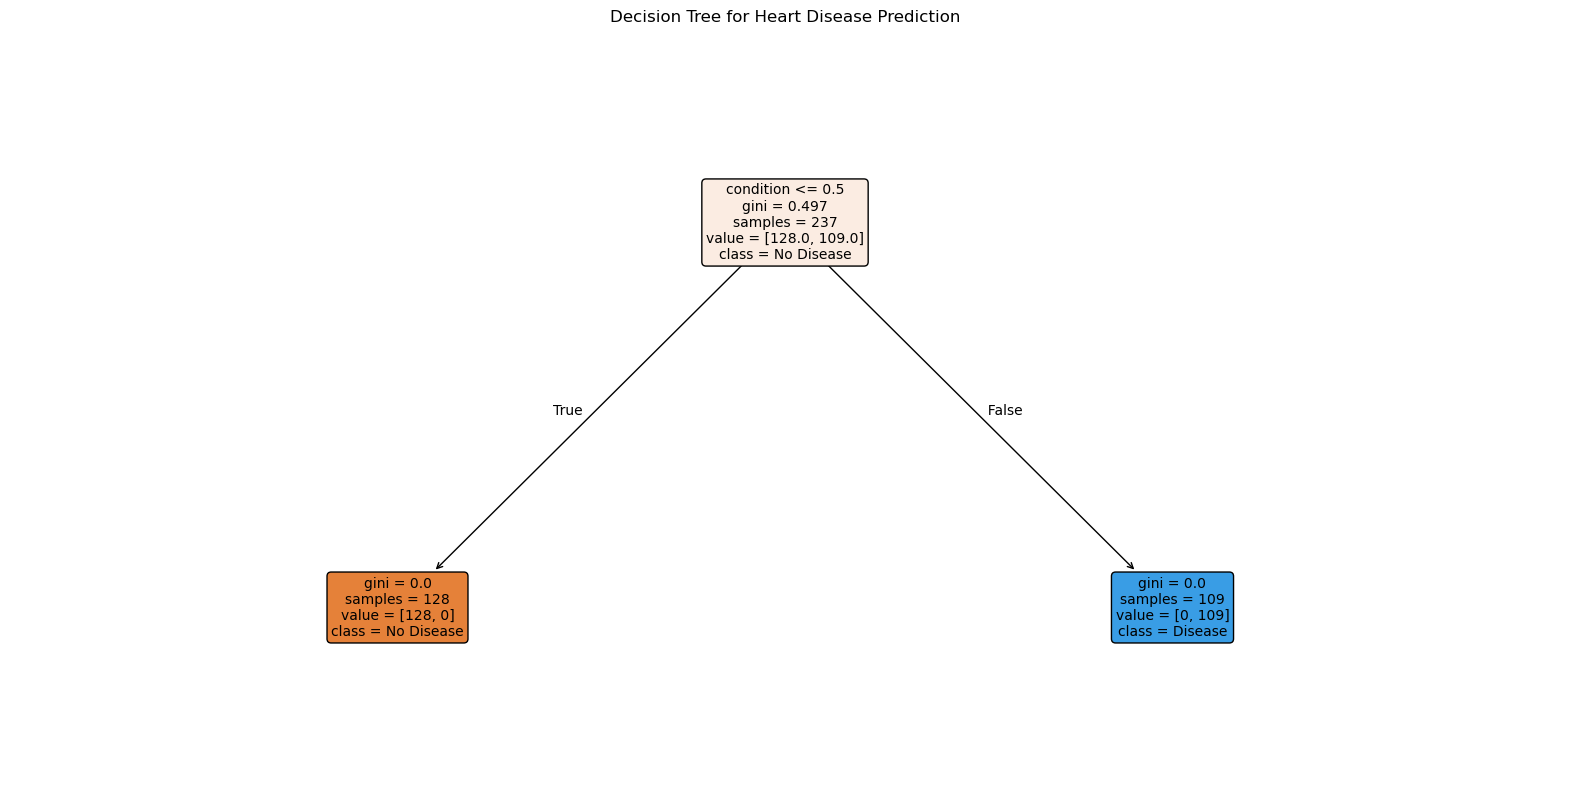

In [14]:
# Visualize
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No Disease", "Disease"],filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Heart Disease Prediction")
plt.show()

In [16]:
#analyze Overfitting and Control Tree Depth 
from sklearn.metrics import accuracy_score
depths = range(1, 11)
train_accuracies = []
test_accuracies = []
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print("Depth:", depth, "Train Acc =", round(train_acc, 3), "Test Acc =", round(test_acc, 3))


Depth: 1 Train Acc = 1.0 Test Acc = 1.0
Depth: 2 Train Acc = 1.0 Test Acc = 1.0
Depth: 3 Train Acc = 1.0 Test Acc = 1.0
Depth: 4 Train Acc = 1.0 Test Acc = 1.0
Depth: 5 Train Acc = 1.0 Test Acc = 1.0
Depth: 6 Train Acc = 1.0 Test Acc = 1.0
Depth: 7 Train Acc = 1.0 Test Acc = 1.0
Depth: 8 Train Acc = 1.0 Test Acc = 1.0
Depth: 9 Train Acc = 1.0 Test Acc = 1.0
Depth: 10 Train Acc = 1.0 Test Acc = 1.0


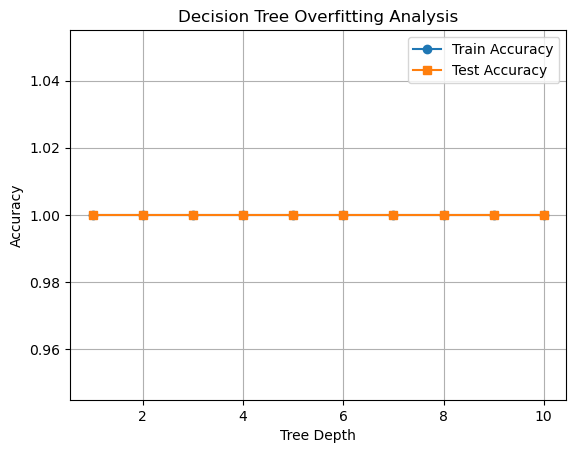

In [17]:
#visualize
plt.plot(depths, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(depths, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Overfitting Analysis")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#: Train a Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
#evaluation
train_rf_acc = accuracy_score(y_train, rf_clf.predict(X_train))
test_rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))
round(train_rf_acc, 3)

1.0

In [22]:
round(test_rf_acc, 3)

1.0

In [23]:
#interpretation
import numpy as np
importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)



      Feature  Importance
13  condition    0.516536
12       thal    0.094935
11         ca    0.065954
7     thalach    0.062884
9     oldpeak    0.051623
2          cp    0.036344
3    trestbps    0.035063
0         age    0.032902
8       exang    0.024969
4        chol    0.024812
1         sex    0.023186
10      slope    0.021394
6     restecg    0.006102
5         fbs    0.003296


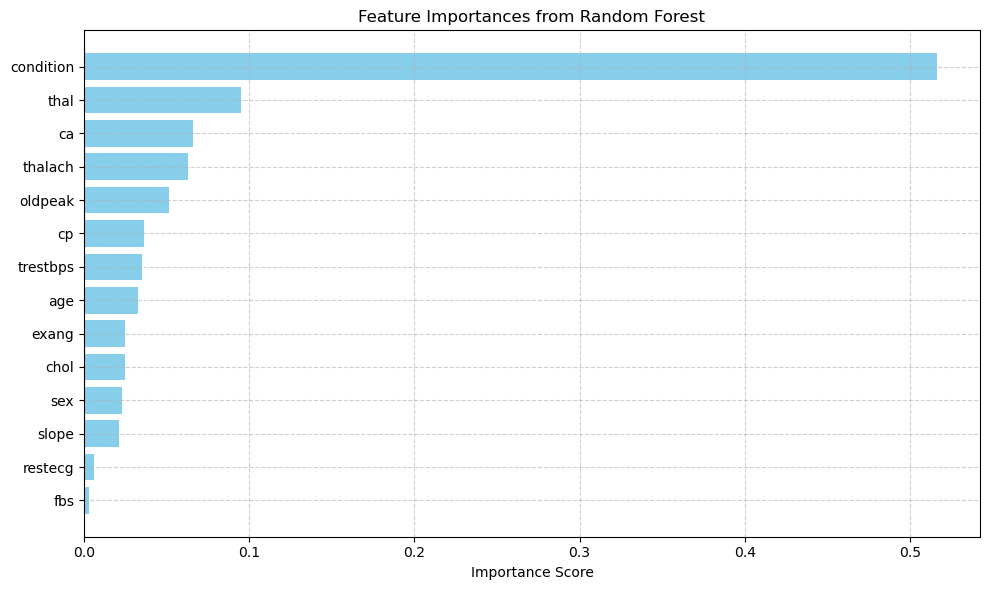

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # most important at top
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [25]:
#cross-validation
from sklearn.model_selection import cross_val_score


In [26]:

scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42),
                         X, y, cv=5, scoring='accuracy')
scores

array([1., 1., 1., 1., 1.])

In [27]:
y.value_counts()


target
0    160
1    137
Name: count, dtype: int64

In [28]:
round(scores.mean(), 3)

np.float64(1.0)

In [29]:
round(scores.std(), 3)


np.float64(0.0)